In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import curve_fit

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
# path1 = "../NoneqTrans2/Data_test/80x80/trun2_d1/"
path1 = "../NoneqTrans2/Data_test/par_set1/trun1_d1/"
# Python Data Single run
A1 = np.loadtxt(path1 + "delta_f2py_test.dat")
nn = np.size(A1,0)
print(np.shape(A1))

#### Python Data Voltage Up
T_up = A1[:,0]
delta_up = A1[:,1]
I_up = A1[:,6]
Vs_up = A1[:,4]
R_up = A1[:,7]
# dR_up = A1[:,9]
mx = 80
my = 80

inputs = open(path1+"input_par.dat", "r")
Nsamp = 128
maxdist = mx//2
print(inputs.read())

# Tcrit = 0.56
Tcrit = 1.32

(100, 11)
{'mx': 64, 'my': 64, 'nwarm': 400000, 'nskip': 16, 'Tc': 1.0, 'coef': 0.1, 'dphi': 0.2, 'gamma': 0.1, 'r0': 3.5, 'g2': 1.0, 'g4': -1.0, 'g6': 0.5, 'Rload': 1.0, 'mfphi': False, 'tloop': True}{'Tcrit': 0.56, 'dE': 0.1, 'minE': 0.1, 'maxE': 10.1, 'dTb': 0.02, 'minT': 0.02, 'maxT': 2.02, 'nmeas': 2048, 'Tbath': 0.9, 'seed': 45823121, 'NPEs': 1, 'iphi': True}


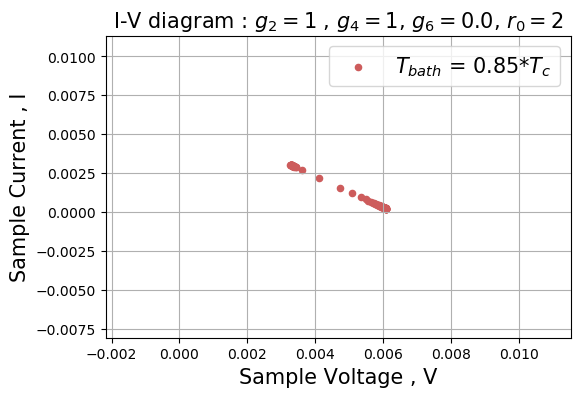

In [4]:
plt.scatter(Vs_up, I_up, s = 20.0, c = 'IndianRed', label='$T_{bath}$ = 0.85*$T_c$' , marker = 'o')
# plt.plot(Vs_up, I_up,  c = 'IndianRed')


# plt.plot(Data_Set[:,0],Data_Set[:,1])
plt.legend(fontsize = 15)
plt.title('I-V diagram : $g_2 = 1$ , $g_4 = 1$, $g_6 = 0.0$, $r_0 = 2.$' , fontsize = 15)
# plt.title('I-V diagram , $n_{skip}$=32, $E$ = 0.1')
plt.xlabel('Sample Voltage , V', fontsize = 15 )
plt.ylabel('Sample Current , I', fontsize = 15 )
# plt.xlim(14.0,22.)
plt.grid(b=True,which='major', axis='both')
# plt.savefig(path1 + "I-V.pdf")

plt.show()

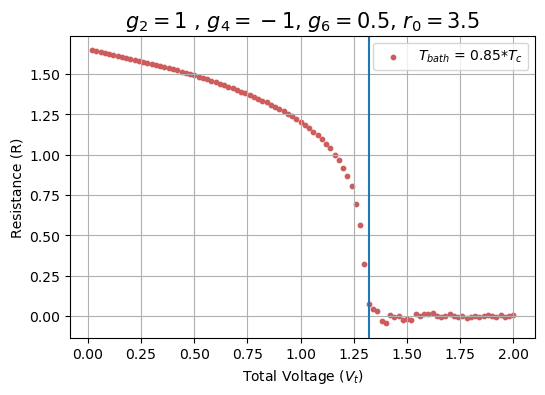

In [5]:
plt.scatter(T_up,delta_up, s=10.0,c="IndianRed",label="$T_{bath}$ = 0.85*$T_c$")
plt.ylabel('Resistance (R)')
plt.xlabel('Total Voltage ($V_t$)')

# plt.scatter(E_up,delta_up, s=10.0,c="IndianRed", label = r'$\langle \Delta \rangle$')
# plt.ylabel( 'Average $\Delta$')
# plt.xlabel('Bath Temperature (T)')

# plt.xlim(18.,30.)
plt.axvline(x=Tcrit)
# plt.title('$g_2 = 1$ , $g_4 = 1$, $g_6 = 0.0$, $r_0 = 2.$' , fontsize = 15)
plt.title('$g_2 = 1$ , $g_4 = -1$, $g_6 = 0.5$, $r_0 = 3.5$' , fontsize = 15)
plt.grid(b=True,which='major', axis='both')
plt.legend()

# plt.savefig(path1 + "Resitance_v_Field.pdf")
plt.show()

In [6]:
G_x = np.loadtxt(path1 + "gofr_x2.dat")
G_y = np.loadtxt(path1 + "gofr_y2.dat")

print(np.shape(G_x), np.shape(G_y))
maxdist = np.shape(G_x)[1]
print(maxdist)

(100, 32) (100, 32)
32


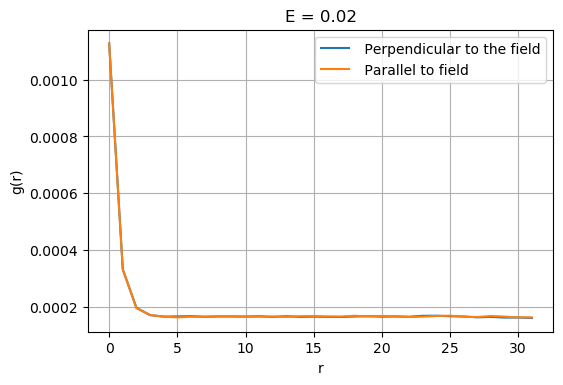

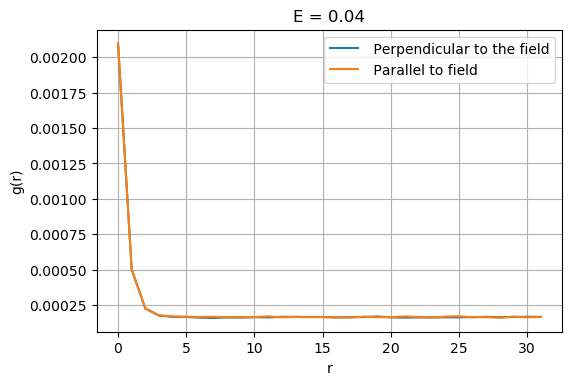

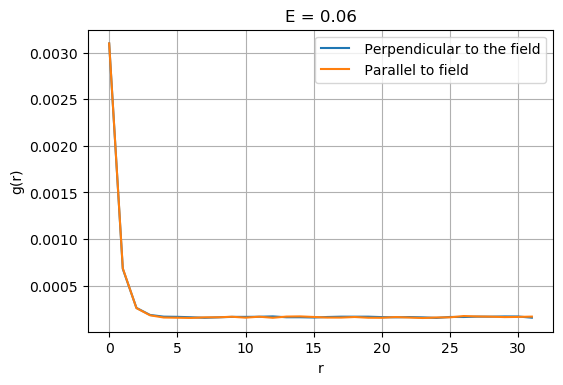

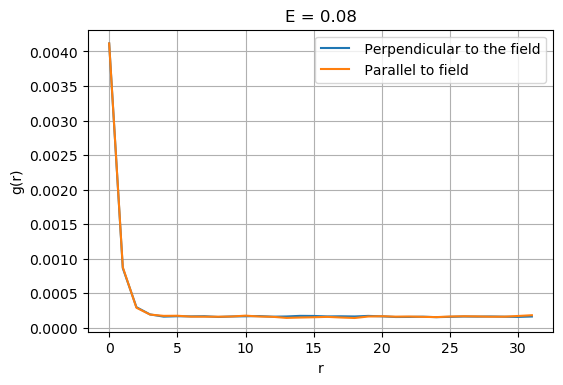

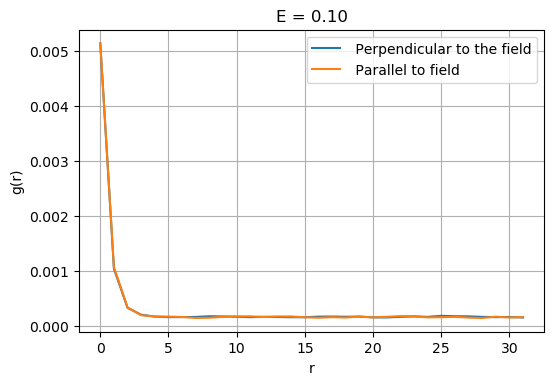

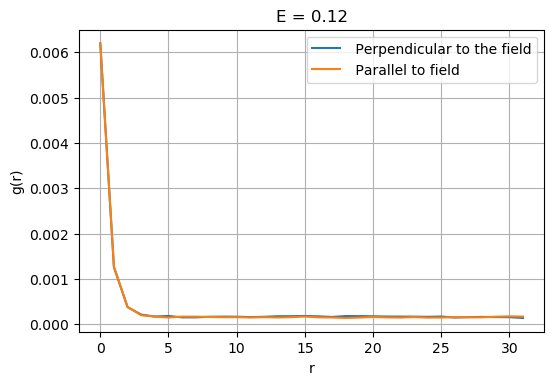

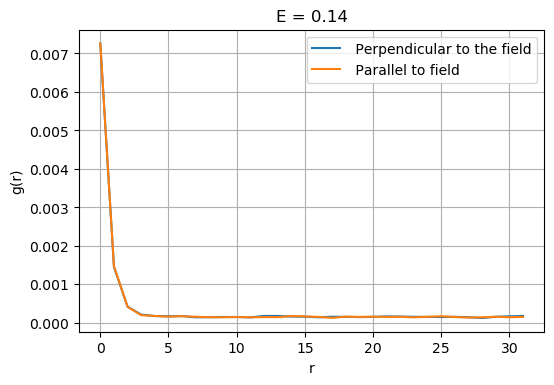

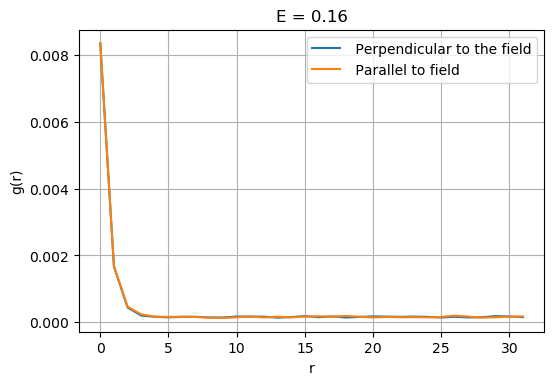

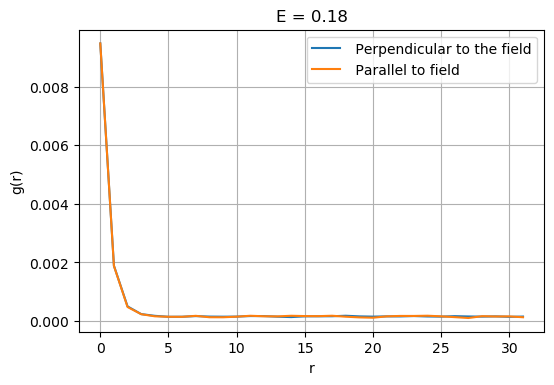

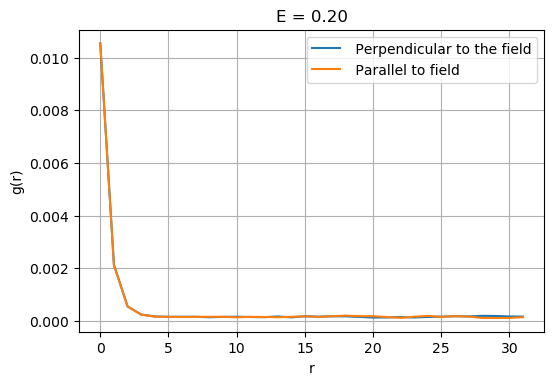

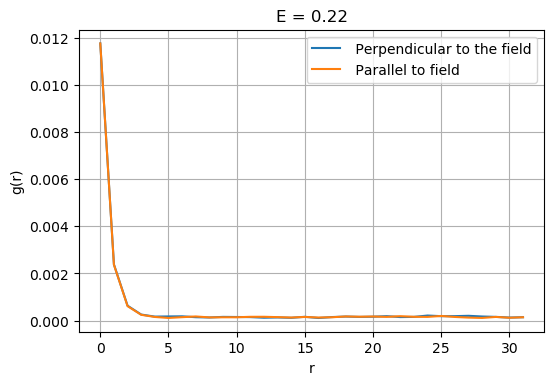

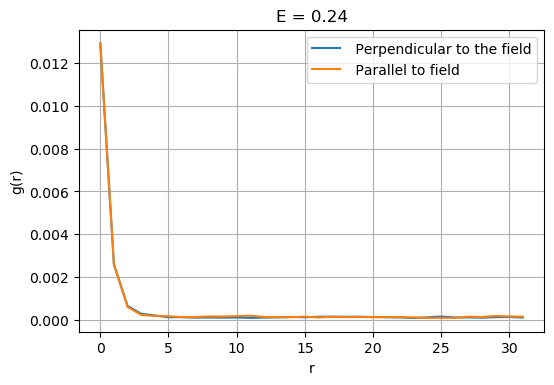

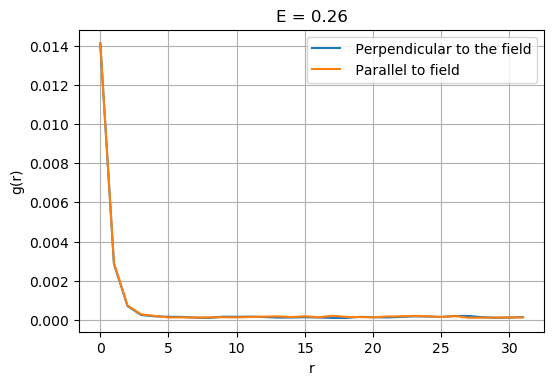

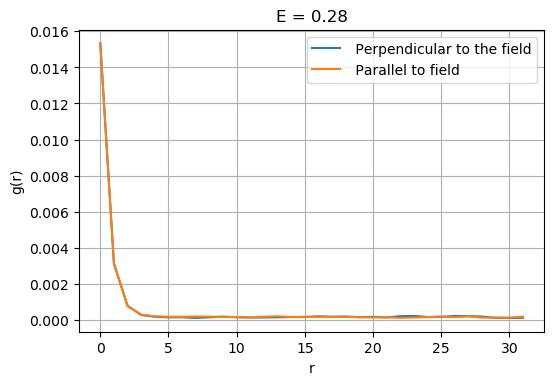

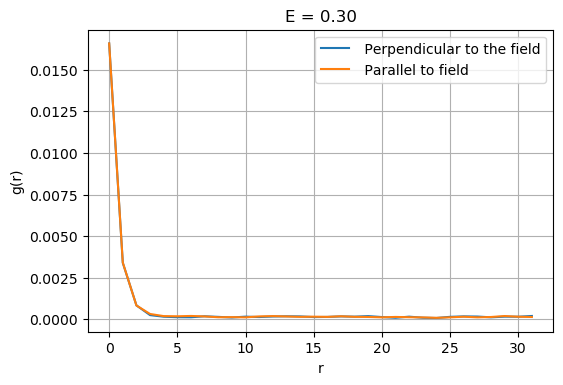

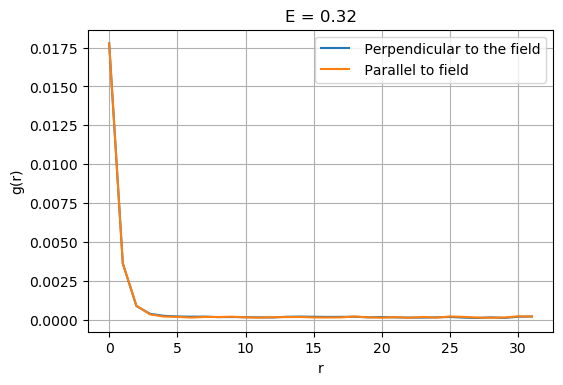

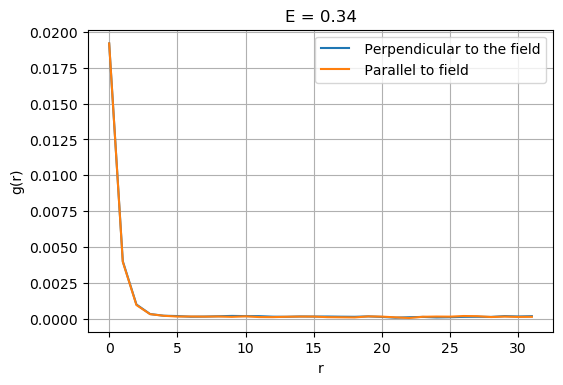

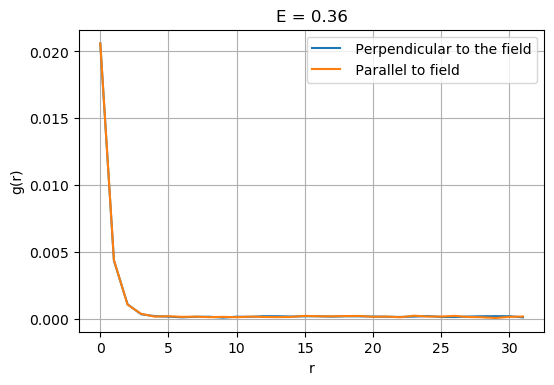

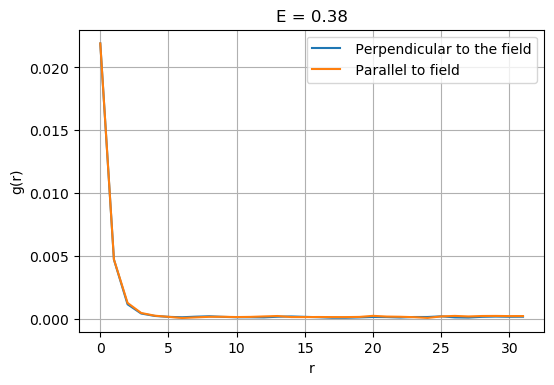

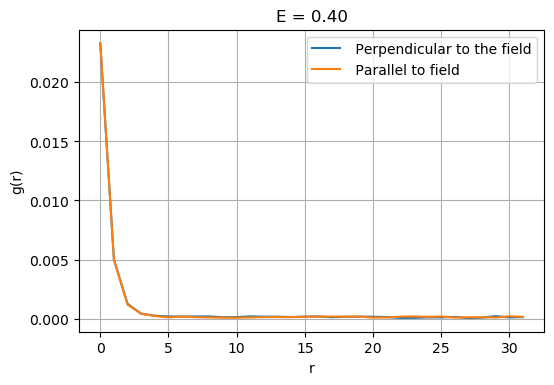

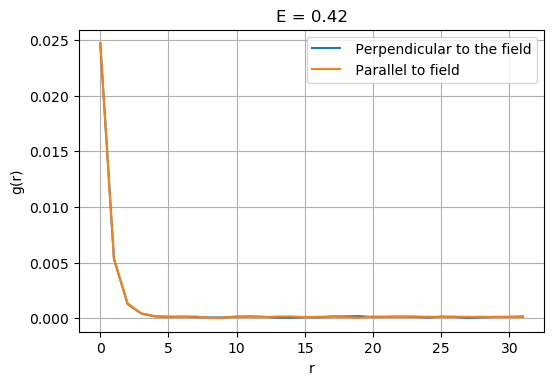

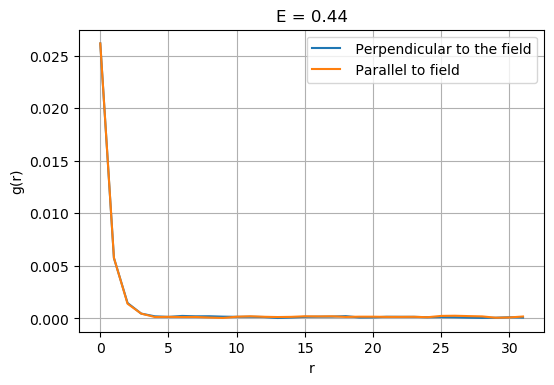

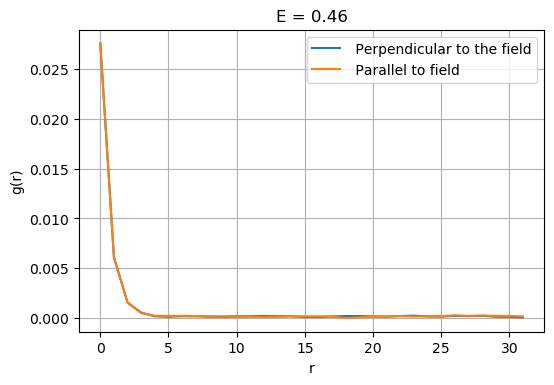

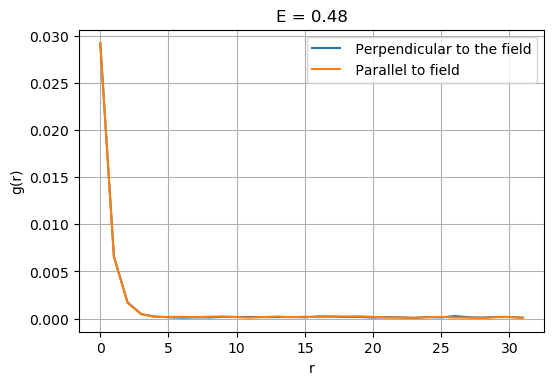

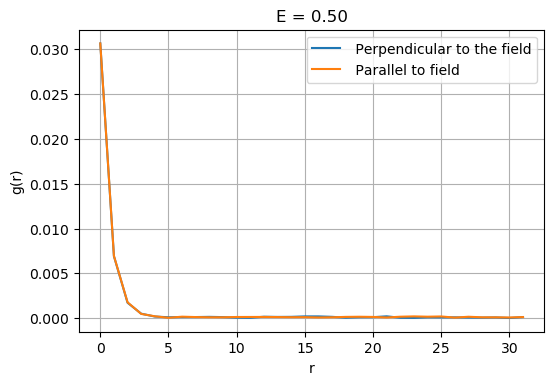

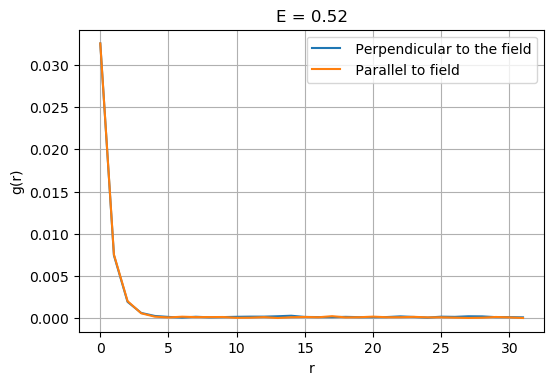

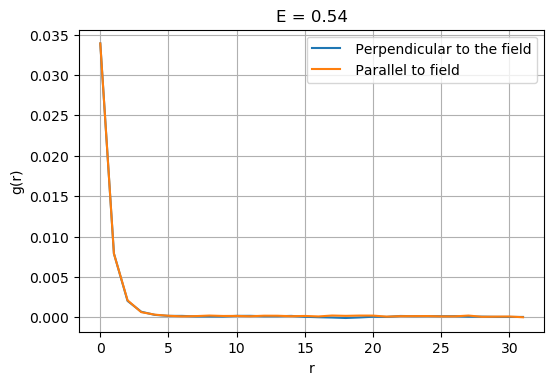

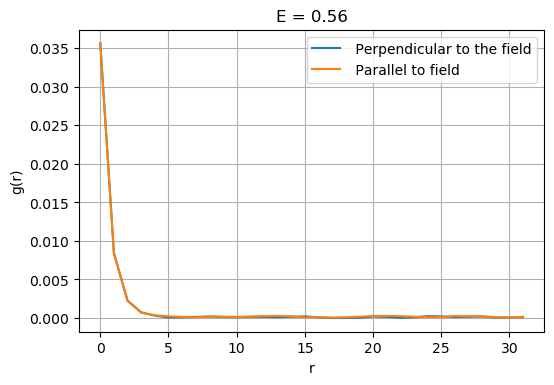

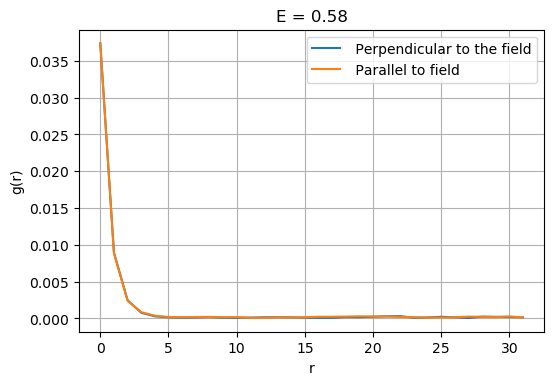

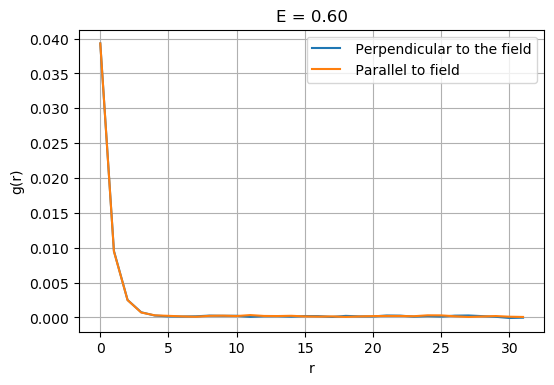

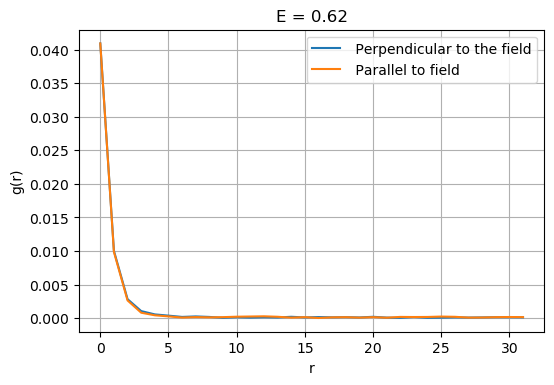

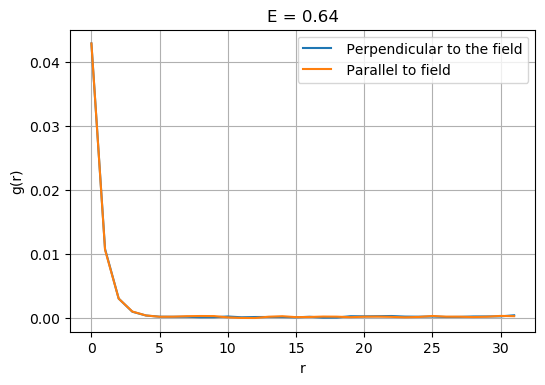

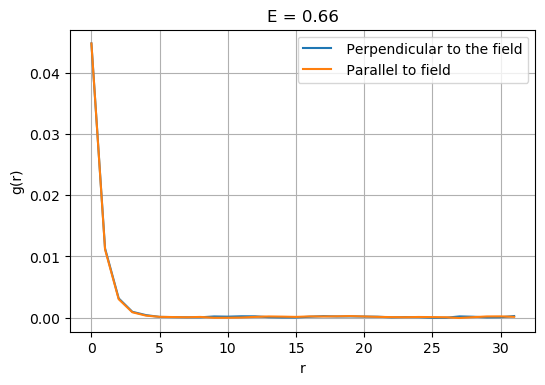

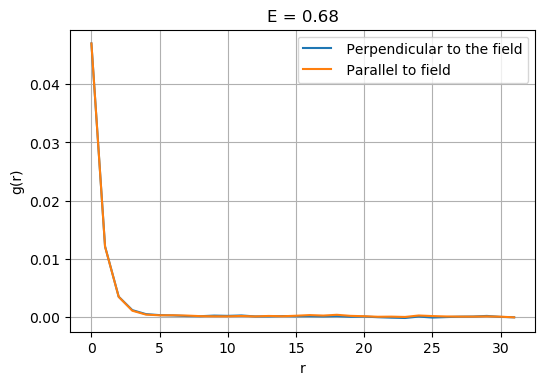

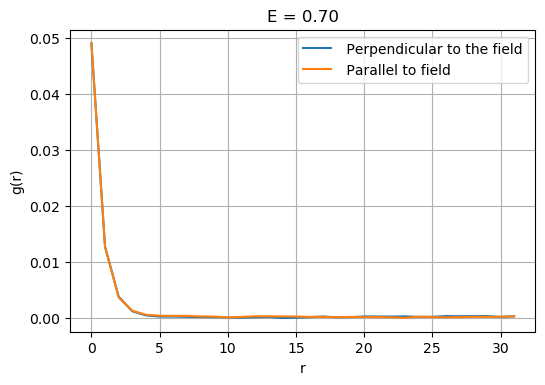

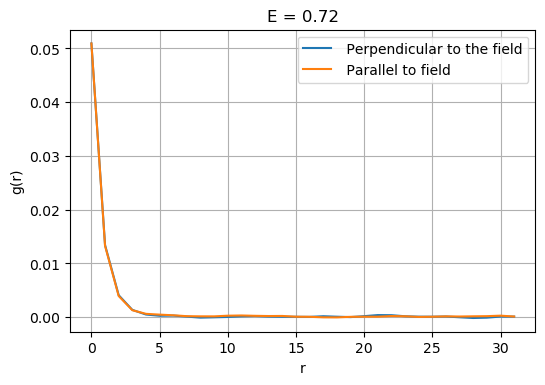

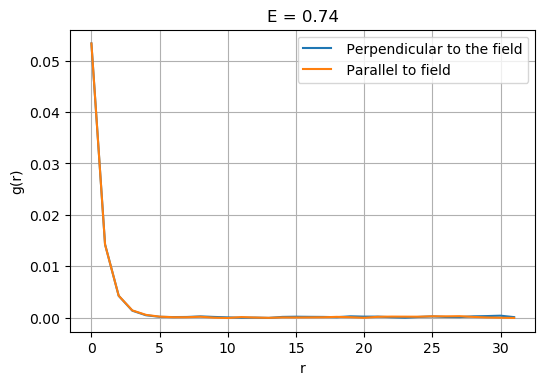

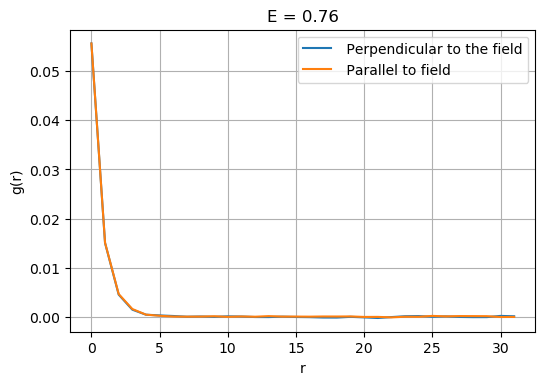

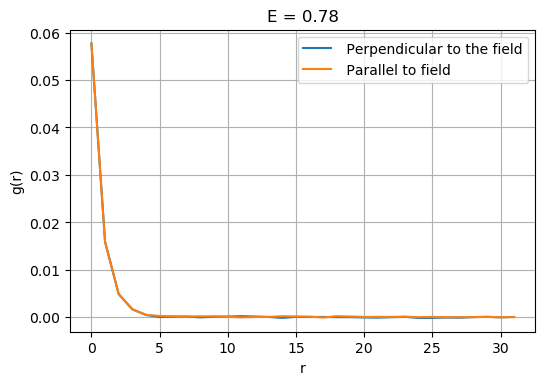

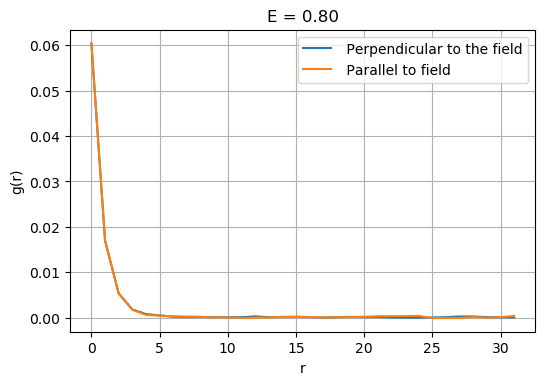

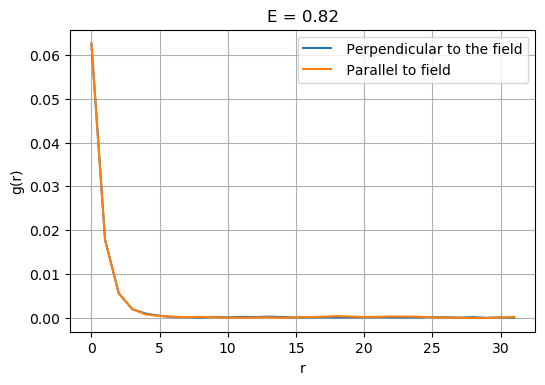

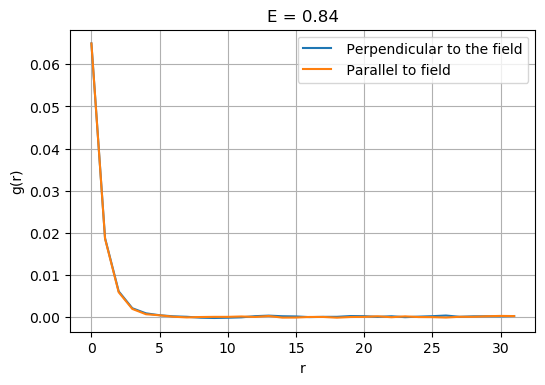

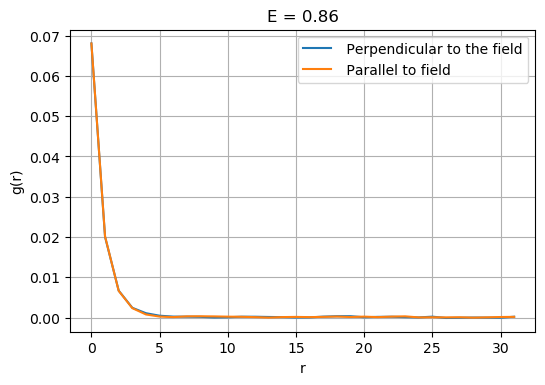

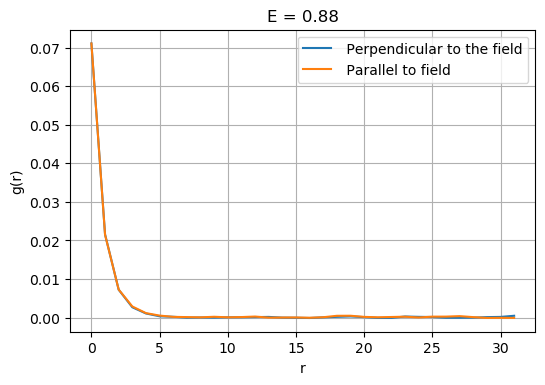

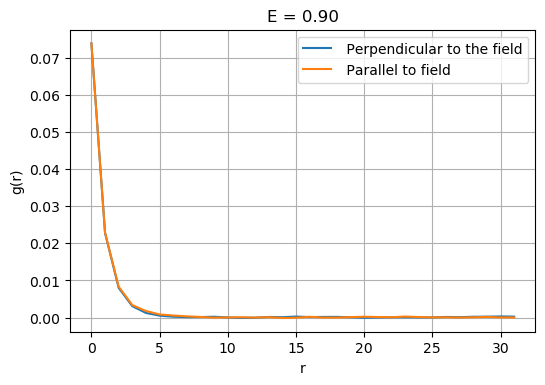

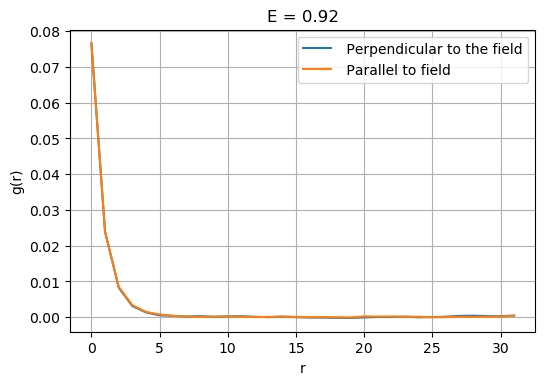

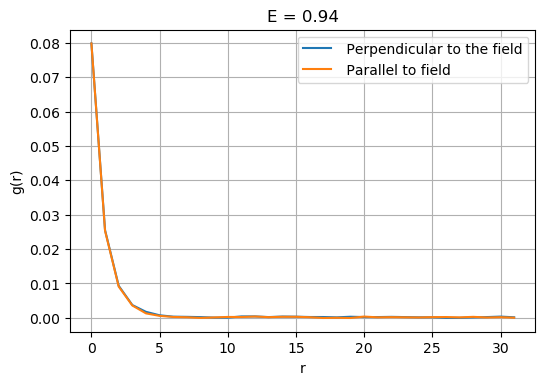

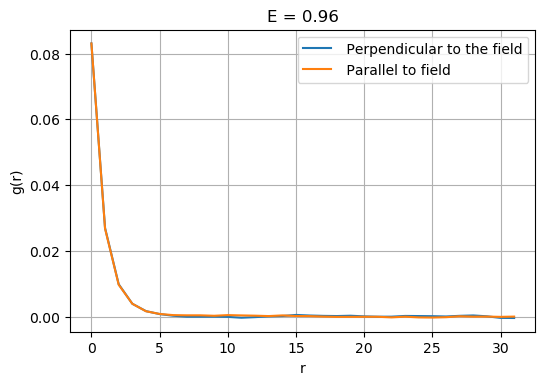

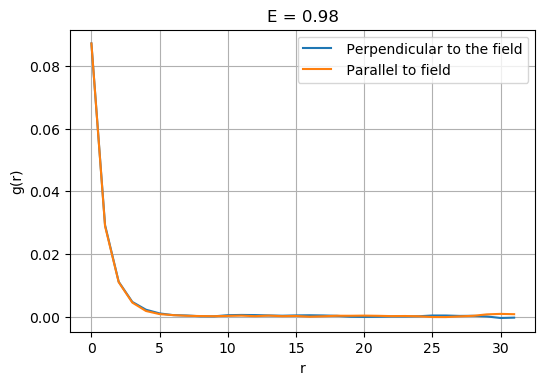

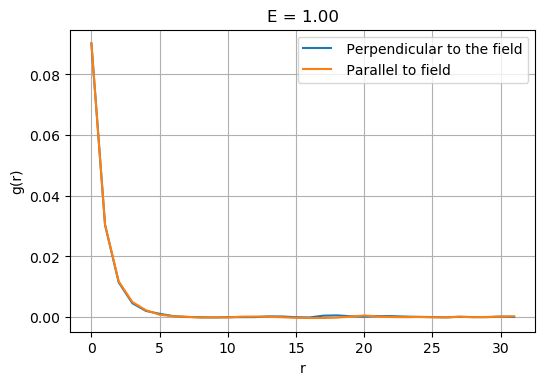

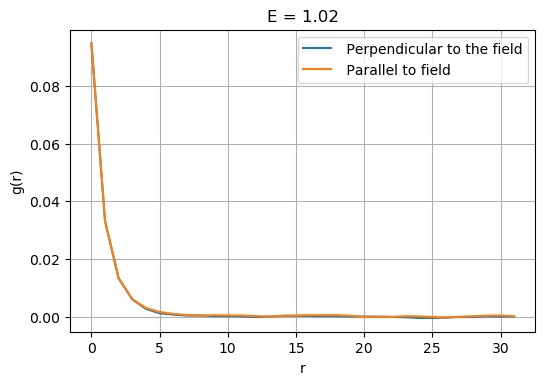

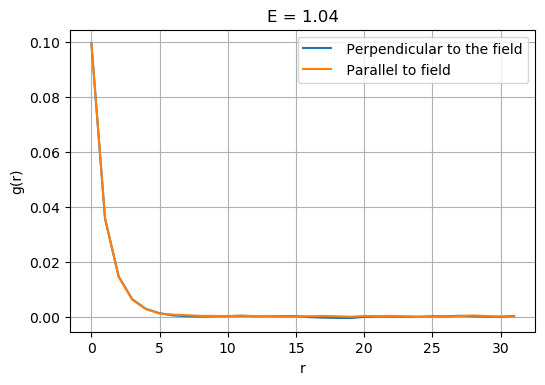

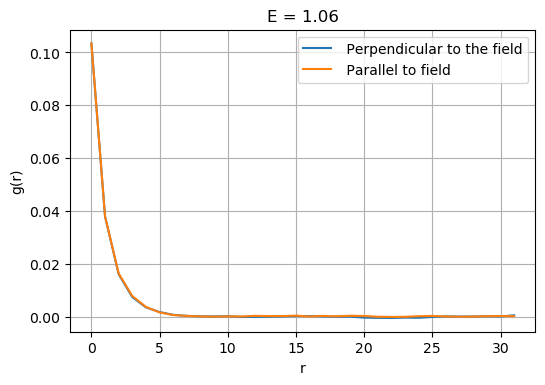

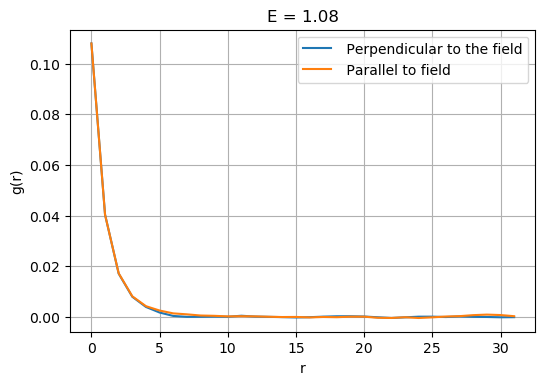

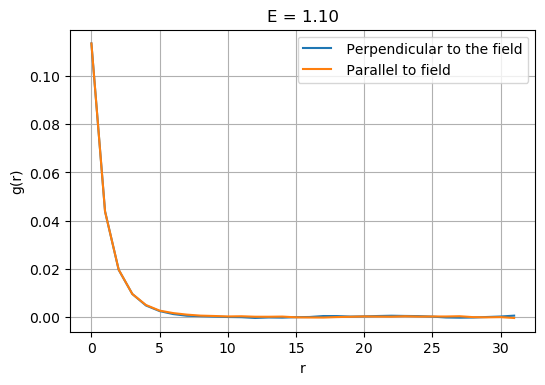

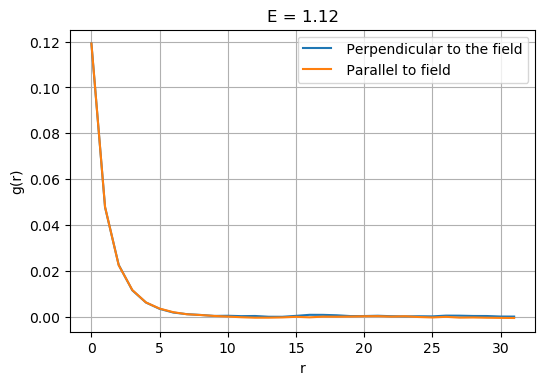

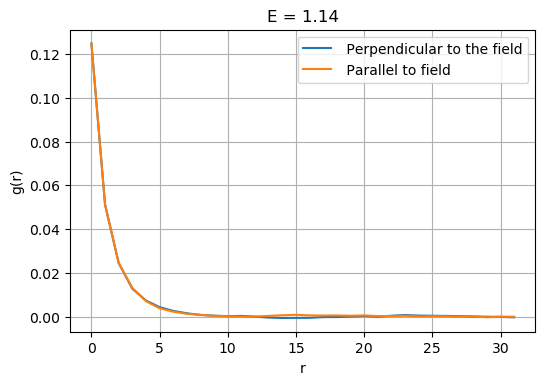

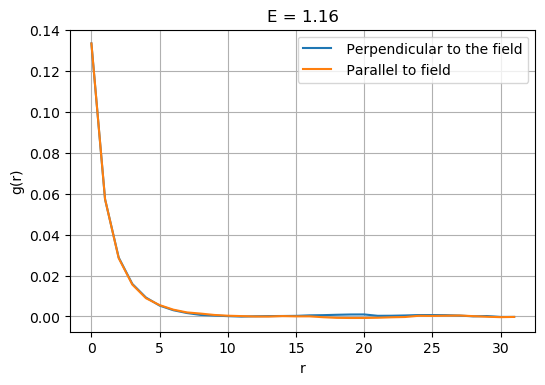

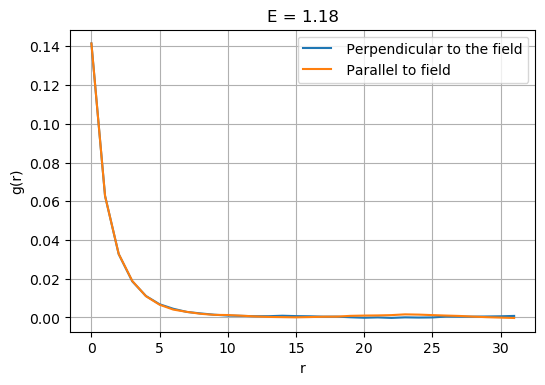

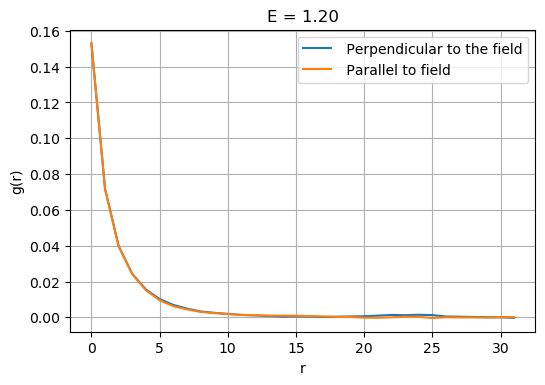

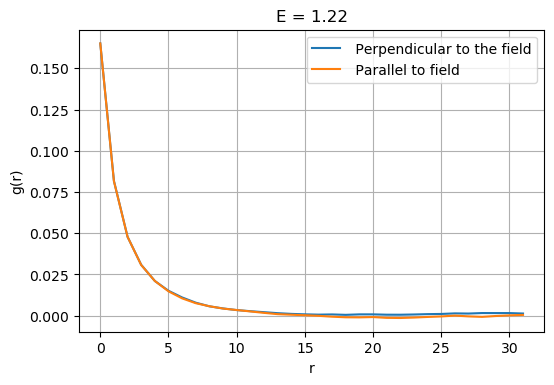

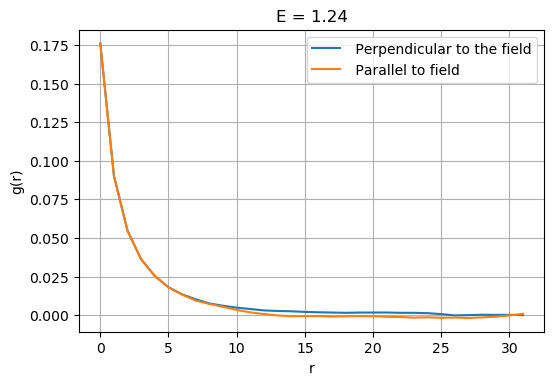

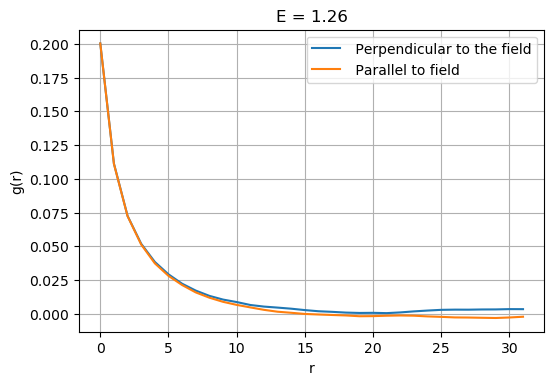

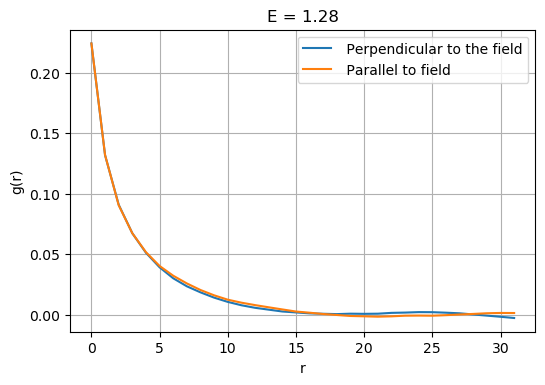

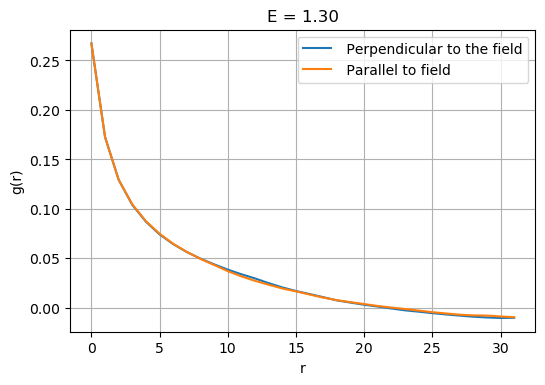

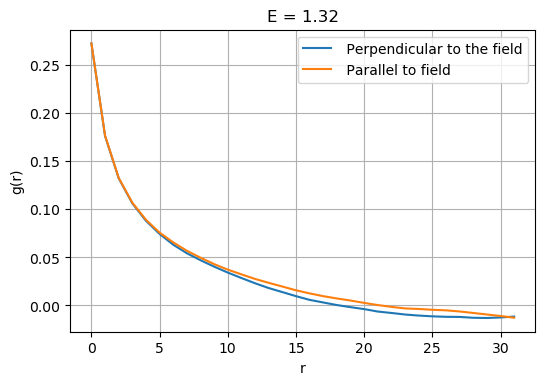

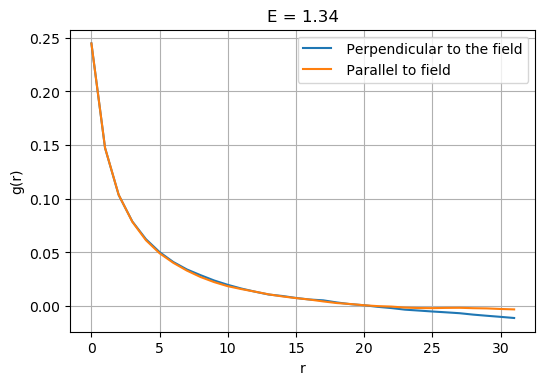

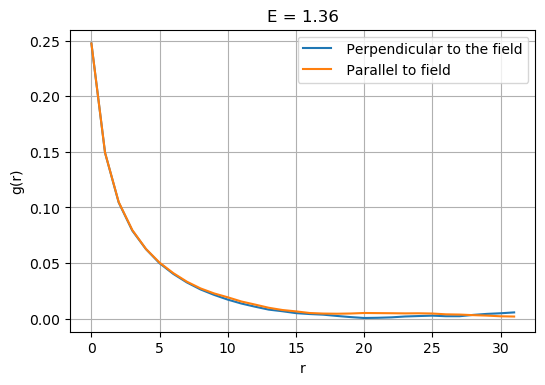

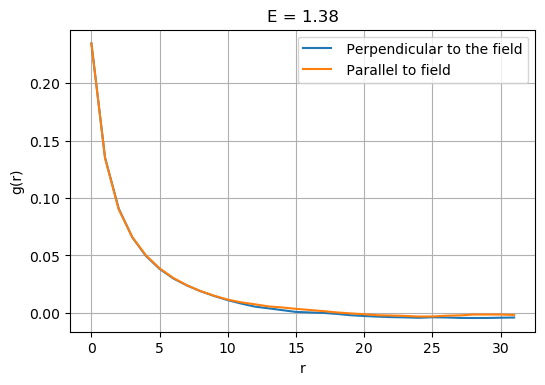

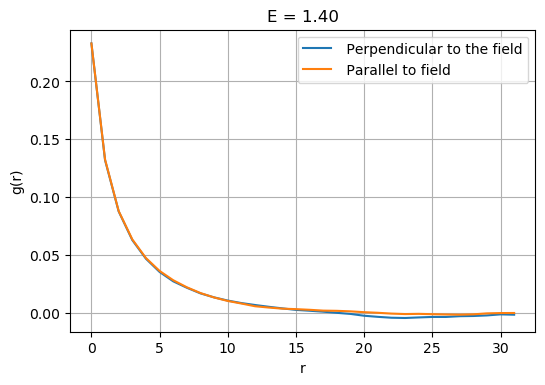

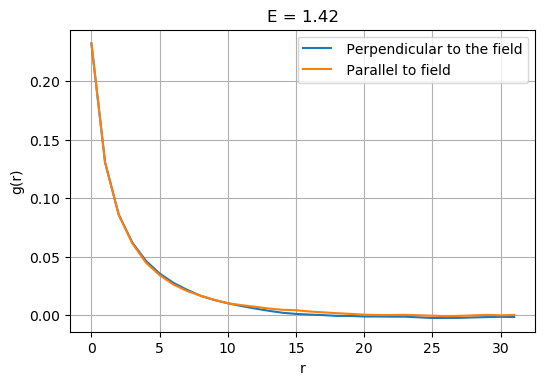

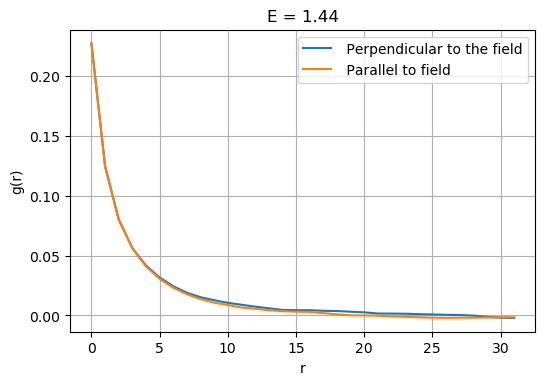

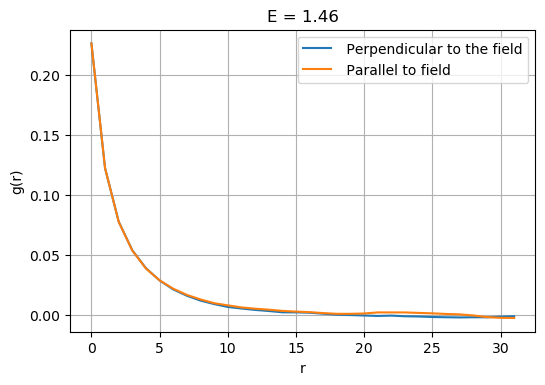

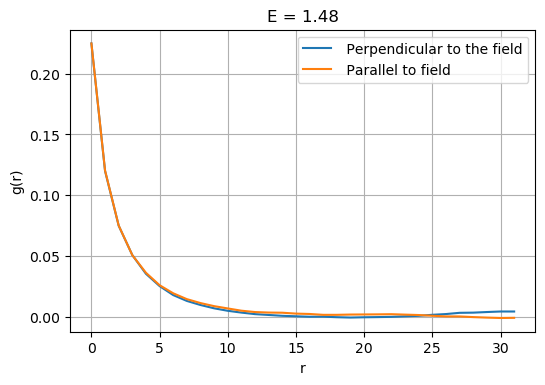

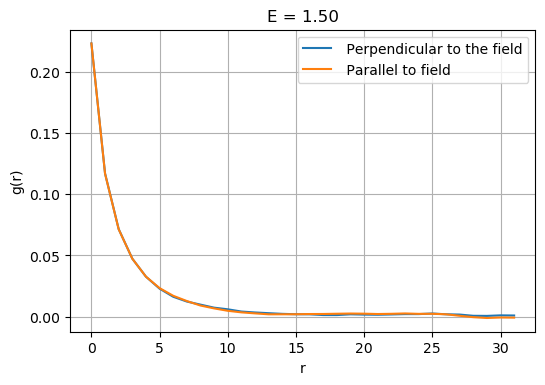

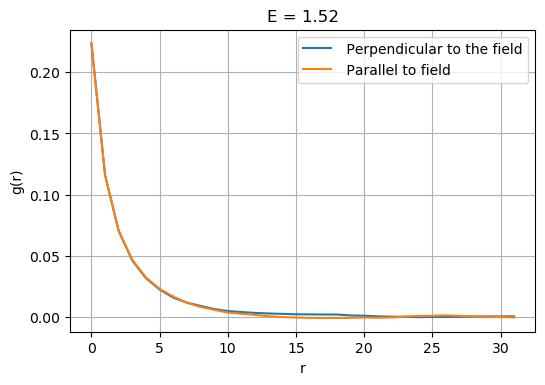

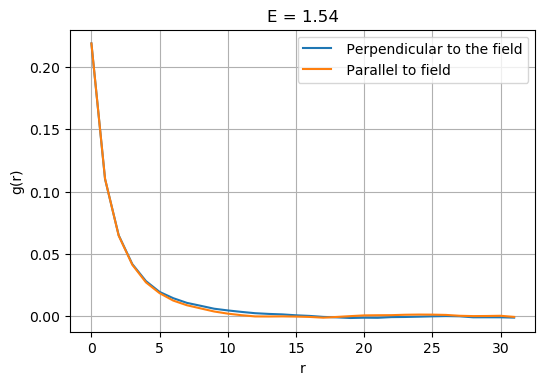

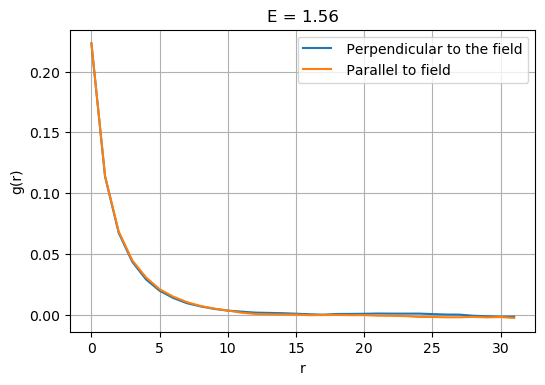

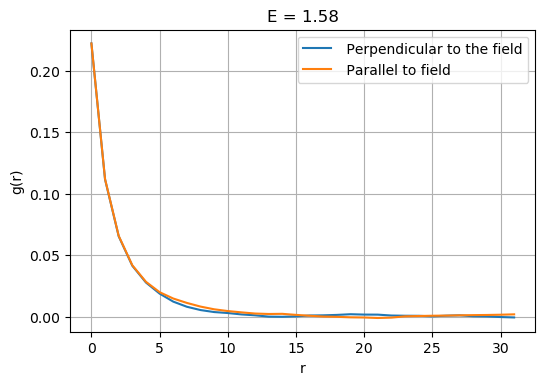

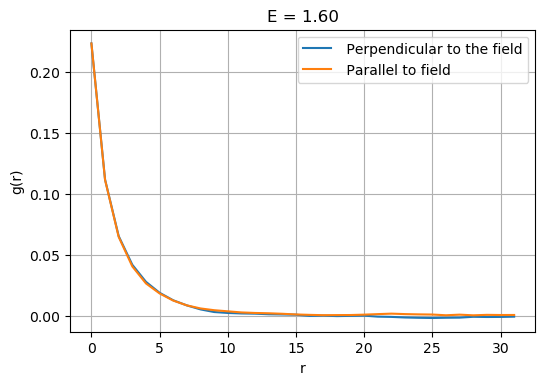

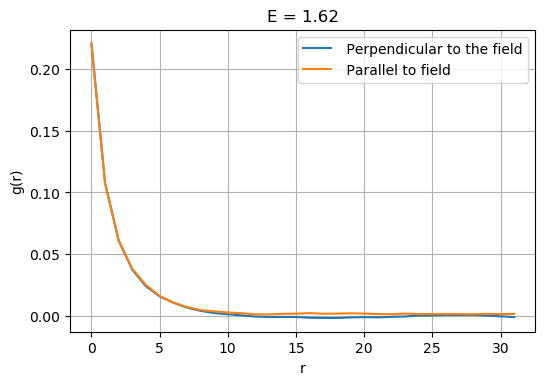

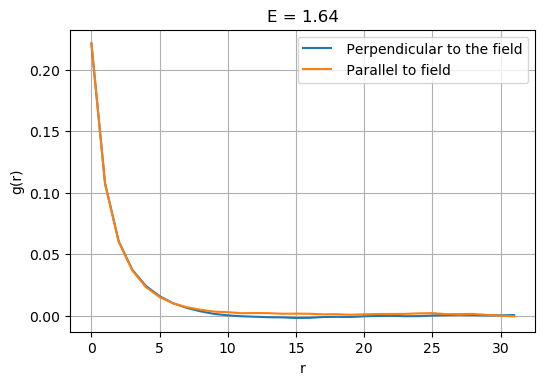

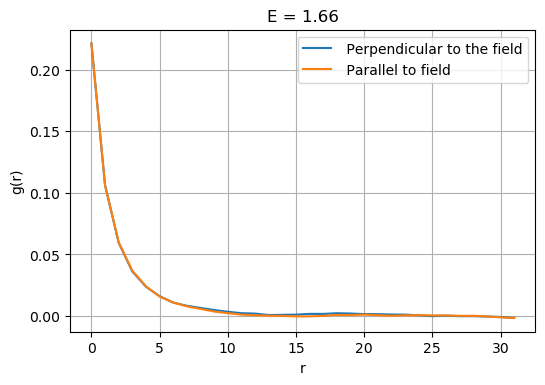

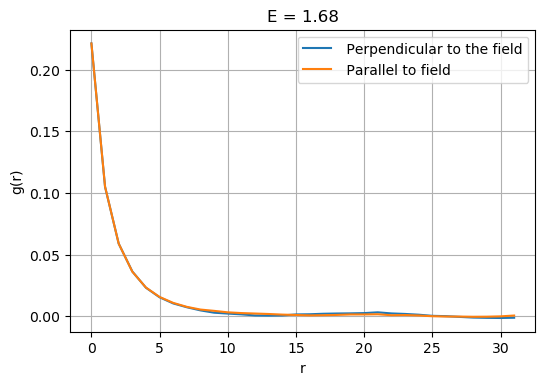

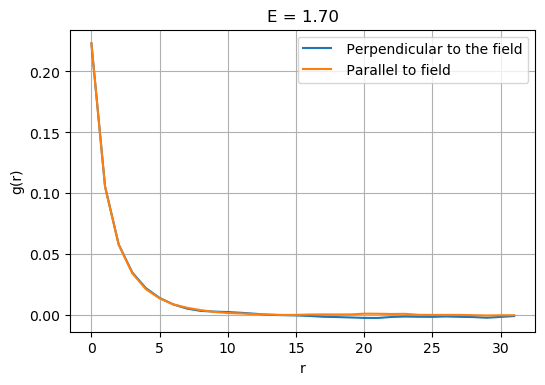

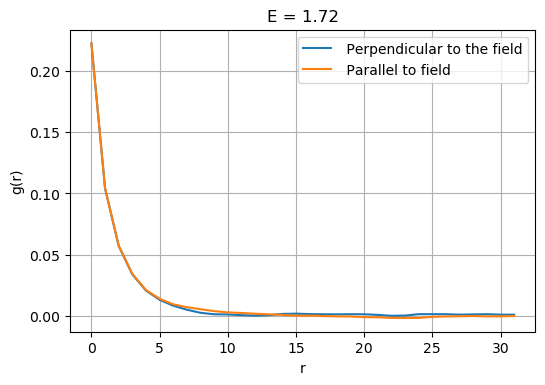

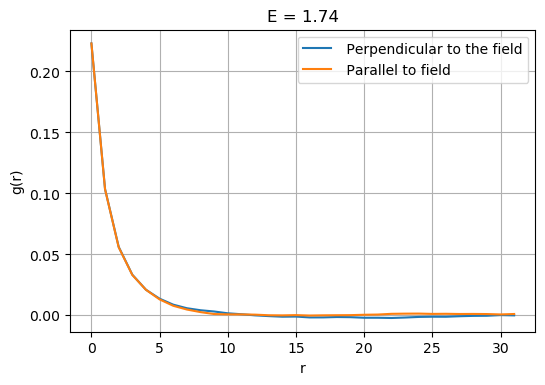

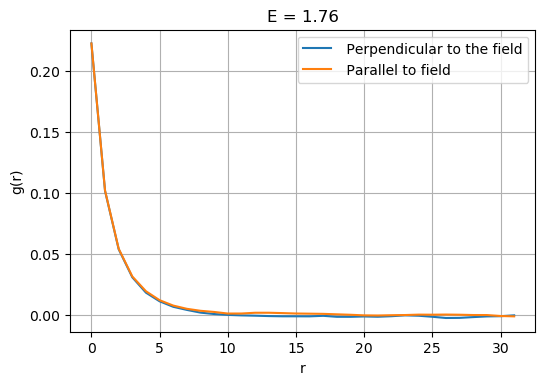

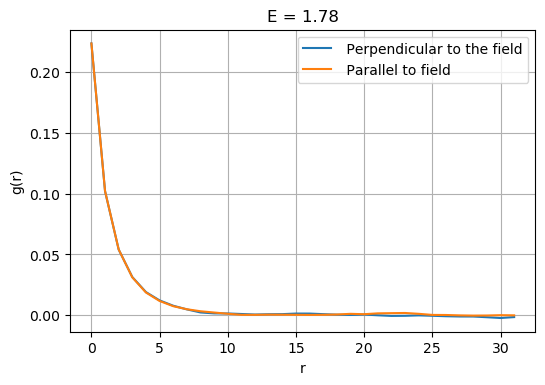

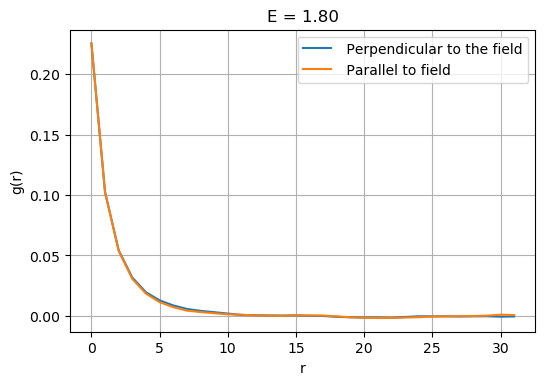

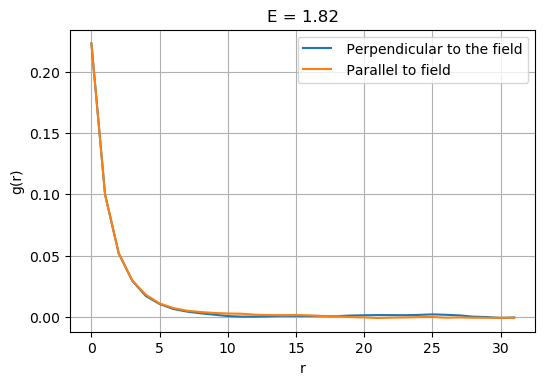

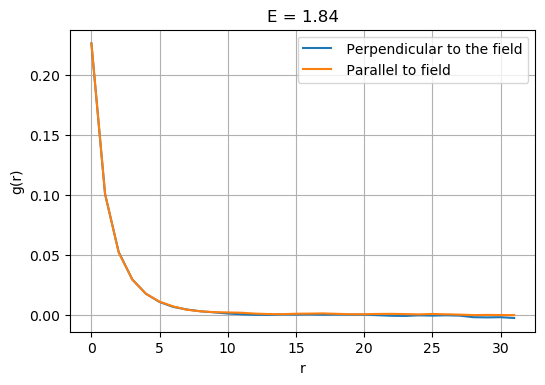

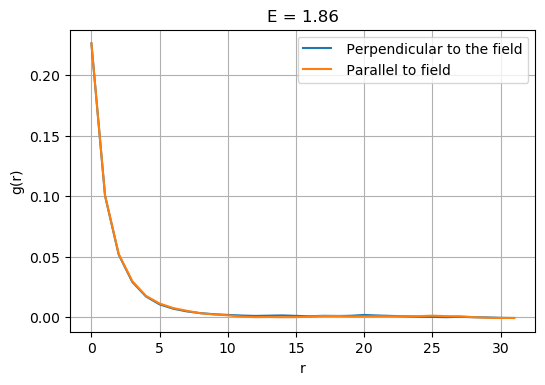

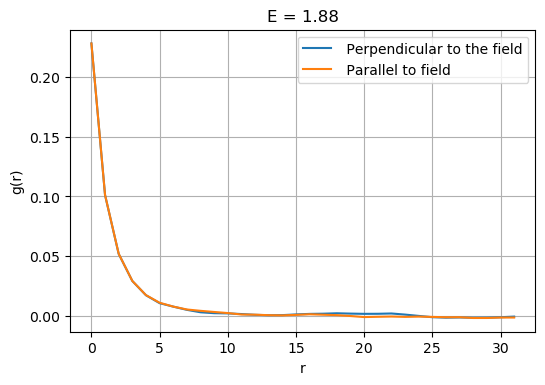

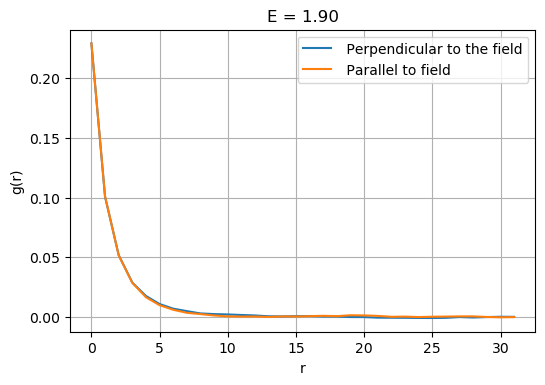

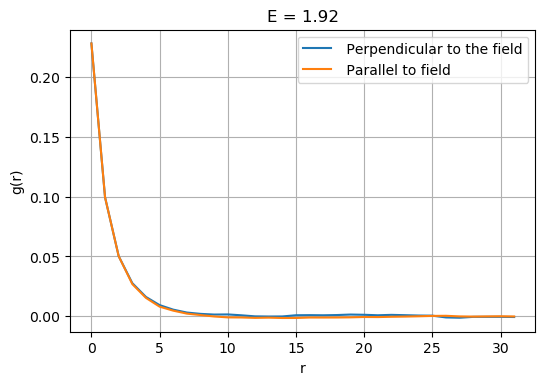

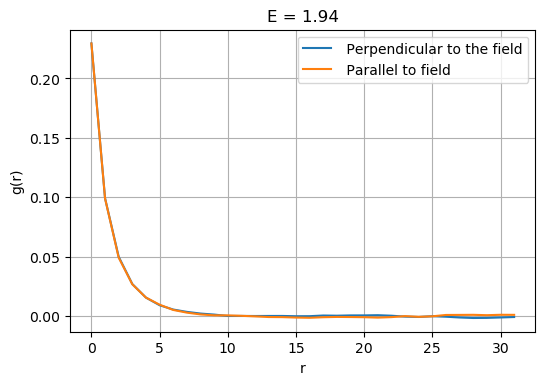

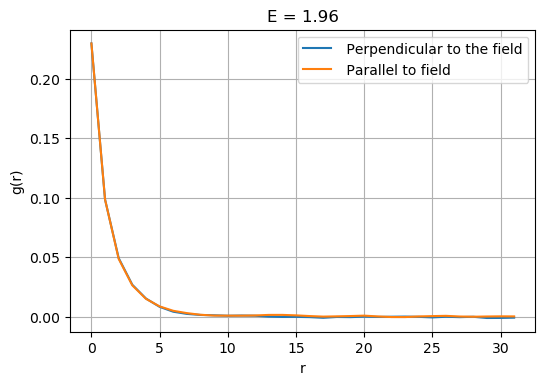

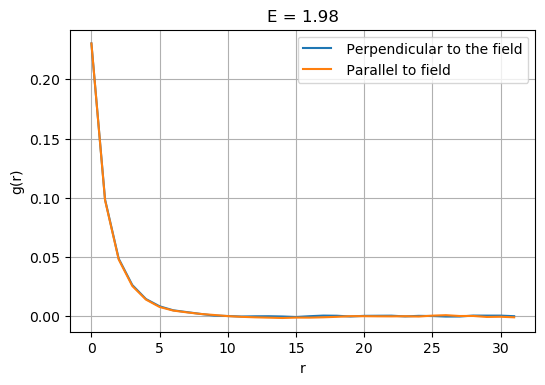

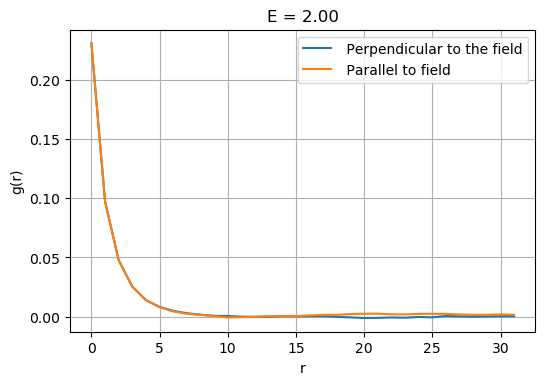

In [7]:
x_ax = np.arange(0,maxdist)

for k in range(nn):
    plt.plot(x_ax,G_x[k,:], label = " Perpendicular to the field")
    plt.plot(x_ax,G_y[k,:], label = " Parallel to field")
    
    plt.ylabel("g(r)")
    plt.xlabel("r")
    plt.title("E = "+ format(T_up[k],'.2f'))
    plt.grid(b=True,which='major', axis='both')
    plt.legend()
    plt.show()



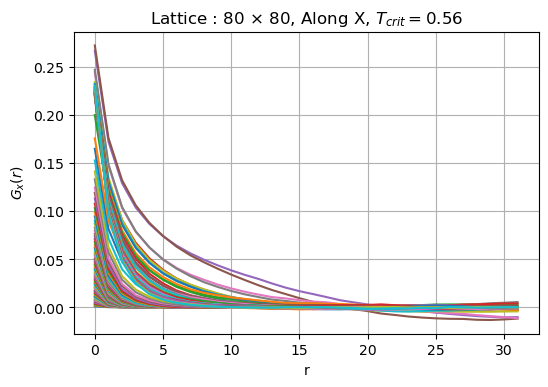

In [8]:
for k in range(0,nn):
    plt.plot(x_ax,G_x[k,:],label = "T = " + format(T_up[k], '.2f') )

plt.title(r'Lattice : 80 $\times$ 80, Along X, $T_{crit} = 0.56$')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_x(r)$')
plt.xlabel('r')

# plt.savefig(path1 + "gofrx_90%_full.pdf",bbox_inches='tight')
plt.show()    



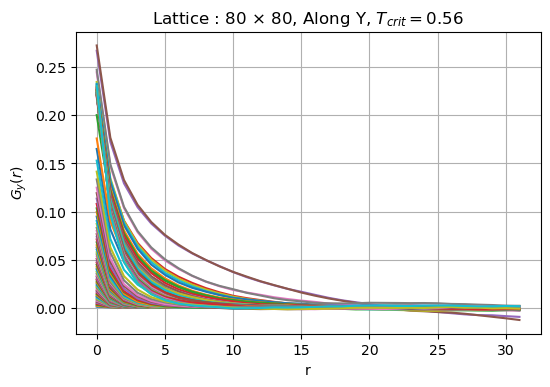

In [9]:
for k in range(0,nn):
    plt.plot(x_ax,G_y[k,:],label = "T = " + format(T_up[k], '.2f') )

plt.title(r'Lattice : 80 $\times$ 80, Along Y, $T_{crit} = 0.56$')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_y(r)$')
plt.xlabel('r')  
# plt.savefig(path1 + "gofry_90%_full.pdf",bbox_inches='tight')
plt.show()    

15 49 63 65 68 89


Text(0.5, 0, 'r')

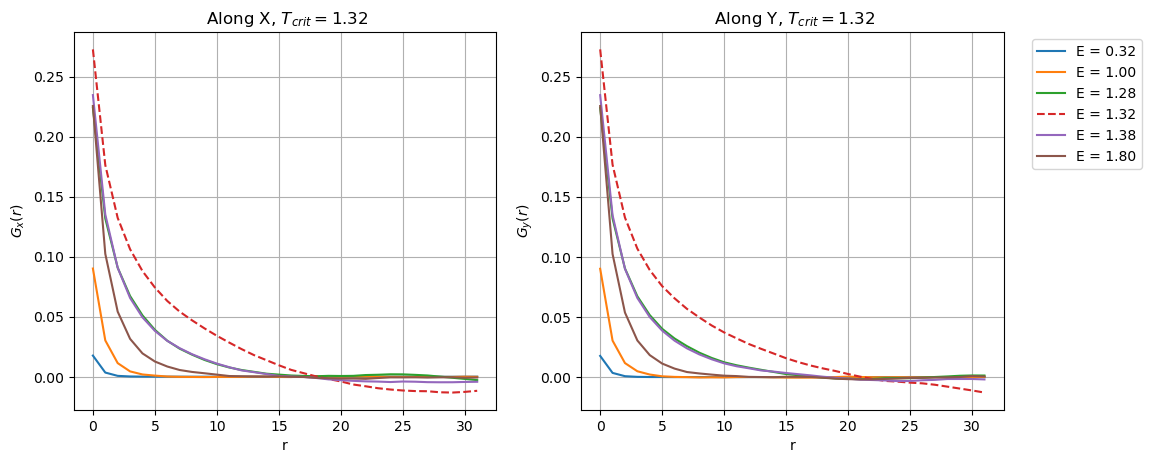

In [10]:
k1 = int(np.argwhere((T_up*10.) == 3.2))
k2 = int(np.argwhere((T_up*10.) == 10.0))
k3 = int(np.argwhere((T_up*10.) == 12.8))
k4 = int(np.argwhere((T_up) == Tcrit))
k5 = int(np.argwhere((T_up*10.) == 13.8))
k6 = int(np.argwhere((T_up*10.) == 18.0))


print(k1,k2,k3,k4,k5,k6)
karr = np.array([k1,k2,k3,k4,k5,k6])


f = plt.figure(figsize=(12, 5)); # plot the calculated values    


sp =  f.add_subplot(1, 2, 1 );
# for k in range(0,nn):
for k in karr:
    if T_up[k] == 1.32:
        plt.plot(x_ax,G_x[k,:],label = "E = " + format(T_up[k], '.2f'), linestyle = 'dashed' )
#     if T_up[k] > 0.4 and T_up[k] < 0.7 :
#     elif T_up[k] > 1.1 and T_up[k] < 1.5 :
#         plt.plot(x_ax,G_x[k,:],label = "E = " + format(T_up[k], '.2f') )
    else :
        plt.plot(x_ax,G_x[k,:],label = "E = " + format(T_up[k], '.2f') )
#         None

# plt.title(r'Lattice:80$\times$80, Along X, $T_{crit} = 0.56$' )
plt.title(r' Along X, $T_{crit} = 1.32$' )
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_x(r)$')
plt.xlabel('r')
   
# plt.show()    


sp =  f.add_subplot(1, 2, 2 );
# for k in range(0,nn):
for k in karr:
    if T_up[k] == 1.32:
        plt.plot(x_ax,G_y[k,:],label = "E = " + format(T_up[k], '.2f'), linestyle = 'dashed' )
#     if T_up[k] > 0.4 and T_up[k] < 0.7 :
#     elif T_up[k] > 1.1 and T_up[k] < 1.5 :
#         plt.plot(x_ax,G_y[k,:],label = "E = " + format(T_up[k], '.2f') )
    else :
        plt.plot(x_ax,G_y[k,:],label = "E = " + format(T_up[k], '.2f') )
#         None

# plt.title(r'Lattice:80$\times$80, Along Y, $T_{crit} = 0.56$')
plt.title(r' Along Y, $T_{crit} = 1.32$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_y(r)$')
plt.xlabel('r')  
# plt.show()


# plt.savefig(path1 + "gofr_temp_dc.pdf",bbox_inches='tight')

In [11]:
hwhm_x = np.zeros(nn)
hwhm_y = np.zeros(nn)
for k in range(nn):
    half_max = np.max(G_x[k,:])/2.
    for r in range(maxdist-1):
        if G_x[k,r] > half_max and G_x[k,r+1] <= half_max:
#             print(x_ax[r+1])
            hwhm_x[k] = x_ax[r+1]

for k in range(nn):
    half_max = np.max(G_y[k,:])/2.
    for r in range(maxdist-1):
        if G_y[k,r] > half_max and G_y[k,r+1] <= half_max:
#             print(x_ax[r+1])
            hwhm_y[k] = x_ax[r+1]


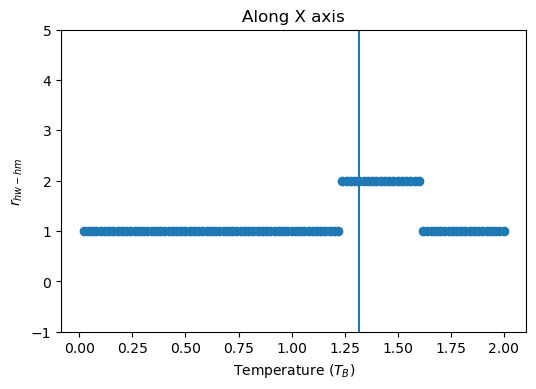

In [12]:
plt.scatter(T_up,hwhm_x)
plt.ylim(-1,5)
plt.axvline(x=Tcrit)
plt.xlabel("Temperature ($T_B$)")
plt.ylabel(r'$r_{hw-hm}$')
plt.title(r'Along X axis')
# plt.legend()
plt.savefig(path1 + "HWHM_X.pdf",bbox_inches='tight')
plt.show()

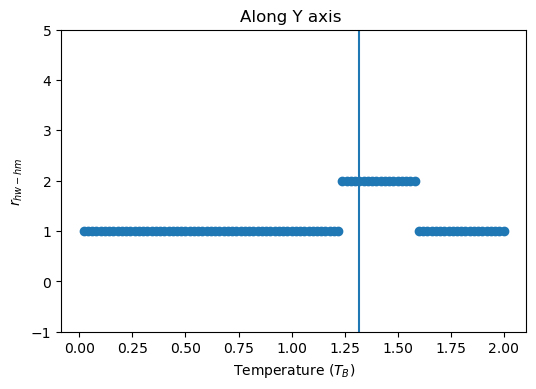

In [13]:
plt.scatter(T_up,hwhm_y)
plt.ylim(-1,5)
plt.axvline(x=Tcrit)
plt.xlabel("Temperature ($T_B$)")
plt.ylabel(r'$r_{hw-hm}$')
plt.title(r'Along Y axis ')
# plt.legend()
plt.savefig(path1 + "HWHM_Y.pdf",bbox_inches='tight')
plt.show()

## Fit for $g(r)$

In [15]:
Gx = np.loadtxt(path1 + "gofr_x_full2.dat")
Gy = np.loadtxt(path1 + "gofr_y_full2.dat")

print(np.shape(Gx), np.shape(Gy))

datpts = np.shape(Gx)[1]

print(datpts, Nsamp, maxdist)
x_ax = np.arange(0.1,maxdist+0.1)
x_ax2 = np.linspace(0.1,32.1,datpts)
x_val = np.tile(x_ax,(Nsamp,1))
x_ax1 = x_val.flatten('F')
# print('x_val :', x_val)

# print(x_ax1)
# print(x_ax2)
print(np.shape(x_val))
print(np.shape(x_ax1))
print(np.shape(x_ax2))

# for k in range(nn):
#     plt.scatter(x_ax1,Gx[k,:], s = 4, label = " Perpendicular to the field")
#     plt.scatter(x_ax1,Gy[k,:], s = 4, label = " Parallel to field")
    
#     plt.ylabel("g(r)")
#     plt.xlabel("r")
#     plt.title("$T_B$ = "+ format(T_up[k],'.2f'))
#     plt.grid(b=True,which='major', axis='both')
#     plt.legend()
#     plt.show()




(100, 4096) (100, 4096)
4096 128 32
(128, 32)
(4096,)
(4096,)


In [16]:
def fit_fn(r,theta,lmbda,A, y0):
    return A*(r**(-theta))*np.exp(-lmbda*r) + y0

def fit_fn2(r,lmbda):
    return A*r**(-lmbda)


# plt.plot(x_ax, fit_fn(x_ax,1.,0.5,0.3,0.2))
# # plt.ylim(0,0.4)
# plt.show()



In [17]:
p0 = [0.5,0.5,0.5,0.5]
Gx_fit = np.zeros((nn,datpts))
thetax = []
xi_x = []

for k in range(nn):
#     if E_up[k]*my <= V_crit:
        p1, pc1 = curve_fit(fit_fn, x_ax1, Gx[k,:], p0)
        per1 = np.sqrt(np.diag(pc1))
#     r = G_x[k,:] - fit_fn(x_ax,*p1)
#     chi2 = np.sum((r)**2)/(nn-2)
#     print(*p1)
        thetax.append(p1[0])
        xi_x.append(1.0/p1[1])
        Gx_fit[k,:] = fit_fn(x_ax2,*p1)
#         plt.plot(x_ax2,fit_fn(x_ax2,*p1), label = "g(r) fit")
#         plt.scatter(x_ax1, Gx[k,:], s=2, label = "g(r)")
#         plt.ylabel("g(r)")
#         plt.xlabel("r")
#         plt.title("$T_B$ = "+ format(T_up[k],'.2f'))
#         plt.grid(b=True,which='major', axis='both')
#         plt.legend()
#         plt.show()




In [18]:
Gy_fit = np.zeros((nn,datpts))

thetay = []
xi_y = []
for k in range(nn):
#     if E_up[k]*my < V_crit:
        p1, pc1 = curve_fit(fit_fn, x_ax1, Gy[k,:], p0)
        per1 = np.sqrt(np.diag(pc1))
#     r = G_x[k,:] - fit_fn(x_ax,*p1)
#     chi2 = np.sum((r)**2)/(nn-2)
#     print(*p1)
        thetay.append(p1[0])
        xi_y.append(1.0/p1[1])
        Gy_fit[k,:] = fit_fn(x_ax2,*p1)
#         plt.plot(x_ax2,fit_fn(x_ax2,*p1), label = "g(r) fit")
#         plt.scatter(x_ax1, Gy[k,:], s=2, label = "g(r)")
#         plt.ylabel("g(r)")
#         plt.xlabel("r")
#         plt.title("$T_B$ = "+ format(T_up[k],'.2f'))
#         plt.grid(b=True,which='major', axis='both')
#         plt.legend()
#         plt.show()




In [19]:
hwhm_x = np.zeros(nn)
hwhm_y = np.zeros(nn)
for k in range(nn):
    half_max = np.max(Gx_fit[k,:])/2.
    for r in range(maxdist-1):
        if Gx_fit[k,r] > half_max and Gx_fit[k,r+1] <= half_max:
#             print(x_ax[r+1])
            hwhm_x[k] = x_ax[r+1]

for k in range(nn):
    half_max = np.max(Gy_fit[k,:])/2.
    for r in range(maxdist-1):
        if Gy_fit[k,r] > half_max and Gy_fit[k,r+1] <= half_max:
#             print(x_ax[r+1])
            hwhm_y[k] = x_ax[r+1]




In [20]:
# plt.scatter(T_up,hwhm_x,label = r'$T_B = 0.85*T_C$')
# # plt.ylim(0,5)
# plt.xlabel("Bath Temperature ($T_B$)")
# plt.ylabel(r'$r_{hw-hm}$')
# plt.title("Perpendicular to the Field")
# plt.axvline(x=Tcrit)
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# # plt.legend()
# # plt.savefig(path1 + "HWHM_X_2.pdf",bbox_inches='tight')
# plt.show()

In [21]:
# plt.scatter(T_up,hwhm_y,label = r'$T_B = 0.85*T_C$')
# # plt.ylim(0,5)
# plt.xlabel("Bath Temperature ($T_B$)")
# plt.ylabel(r'$r_{hw-hm}$')
# plt.title("Parallel to the Field")
# plt.axvline(x=Tcrit)
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# # plt.legend()
# # plt.savefig(path1 + "HWHM_Y_2.pdf",bbox_inches='tight')
# plt.show()

In [22]:
# plt.scatter(T_up,hwhm_y,label = r'Parallel to Field', color = "IndianRed")
# plt.scatter(T_up,hwhm_x,label = r'Perpen. to Field', color = "RoyalBlue")
# # plt.ylim(-1,10)
# plt.xlabel("Bath Temperature ($T_B$)")
# plt.ylabel(r'$r_{hw-hm}$')
# # plt.title(r'$T_B$ = $0.85T_C$')
# plt.axvline(x=Tcrit)
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.legend()
# # plt.savefig(path1 + "HWHM.pdf",bbox_inches='tight')
# plt.show()

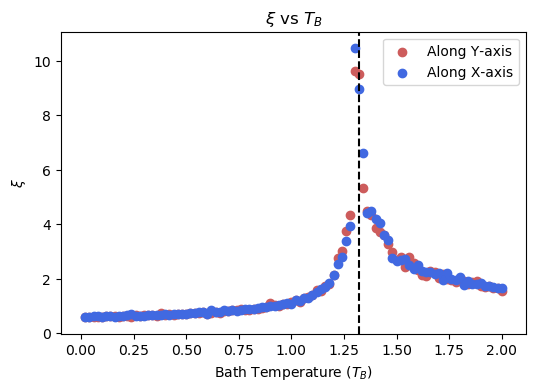

In [23]:
plt.scatter(T_up,xi_y,label = r'Along Y-axis', color = "IndianRed")
plt.scatter(T_up,xi_x,label = r'Along X-axis', color = "RoyalBlue")
# plt.ylim(-1,10)
plt.xlabel("Bath Temperature ($T_B$)")
plt.ylabel(r'$\xi$')
plt.title(r'$\xi$ vs $T_B$')
plt.axvline(x=Tcrit, linestyle = 'dashed' , color = 'black')
# plt.axvline(x=V_metal, linestyle = 'dashed' , color = 'green')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
plt.savefig(path1 + "xi.pdf",bbox_inches='tight')
plt.show()

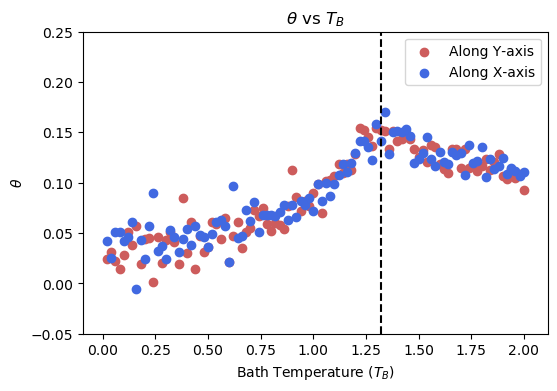

In [24]:
plt.scatter(T_up,thetay,label = r'Along Y-axis', color = "IndianRed")
plt.scatter(T_up,thetax,label = r'Along X-axis', color = "RoyalBlue")
plt.ylim(-0.05,0.25)
plt.xlabel("Bath Temperature ($T_B$)")
plt.ylabel(r'$\theta$')
plt.title(r'$\theta$ vs $T_B$')
plt.axvline(x=Tcrit, linestyle = 'dashed' , color = 'black')
# plt.axvline(x=V_metal, linestyle = 'dashed' , color = 'green')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
# plt.savefig(path1 + "theta.pdf",bbox_inches='tight')
plt.show()